In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [122]:
durak_sayisi = int(input("Durak sayısını girin: "))
hiz = int(input("Metro hızını girin (km/h): "))
yol_uzunlugu = int(input("Yol uzunluğunu girin (km): "))
maksimum_kapasite = int(input("Her durağın maksimum yolcu kapasitesini girin: "))
populasyon_boyutu = int(input("Popülasyon boyutunu girin: "))
jenerasyon_sayisi = int(input("Jenerasyon sayısını girin: "))
mutasyon_orani_baslangic = float(input("Başlangıç mutasyon oranını girin (0 ile 1 arasında): "))

In [172]:
print(durak_sayisi, hiz, yol_uzunlugu, maksimum_kapasite, populasyon_boyutu, jenerasyon_sayisi, mutasyon_orani_baslangic)

5 50 100 500 20 10 0.05


In [123]:
durak_kapasiteleri = np.random.randint(0, 300, durak_sayisi)


In [ ]:
def initialize_population():
    """
    Popülasyonu başlatır. Her birey, durakların rastgele bir sıralamasını temsil eder.
    """
    population = []
    for _ in range(populasyon_boyutu):
        individual = random.sample(range(durak_sayisi), durak_sayisi)
        population.append(individual)
    return population

In [168]:
def fitness_function(individual, current_generation):
     """
    Bu fonksiyon, bir bireyin fitness değerini hesaplar. Fitness, toplam binen yolcu sayısından ceza puanlarının çıkarılmasıyla belirlenir
    ve bireyin algoritma için ne kadar uygun olduğunu temsil eder.
    """
    toplam_binen_yolcu = 0
    kapasite_cezasi = 0
    mevcut_yolcu = 0
    durak_yolcu_bilgileri = []

    for i, durak in enumerate(range(durak_sayisi)):
        if i == 0:  # İlk durakta sadece yolcu binişi olur
            binen_yolcu = random.randint(1, durak_kapasiteleri[durak])
            mevcut_yolcu = binen_yolcu
            toplam_binen_yolcu += binen_yolcu
            durak_yolcu_bilgileri.append((durak, binen_yolcu, 0, mevcut_yolcu))
            continue

        # Yolcuların inişi
        inen_yolcu = random.randint(0, mevcut_yolcu)  # Mevcut yolcudan fazla inen olamaz
        mevcut_yolcu -= inen_yolcu

        # Yeni yolcuların binişi
        binen_yolcu = random.randint(1, durak_kapasiteleri[durak])
        mevcut_yolcu += binen_yolcu
        toplam_binen_yolcu += binen_yolcu

        # Kapasite kontrolü
        if mevcut_yolcu > maksimum_kapasite:
            kapasite_cezasi += mevcut_yolcu - maksimum_kapasite

        # Yolcu bilgilerini kaydet
        durak_yolcu_bilgileri.append((durak, binen_yolcu, inen_yolcu, mevcut_yolcu))

    toplam_ceza = kapasite_cezasi * 0.5

    
    fitness = toplam_binen_yolcu - toplam_ceza
    return fitness, durak_yolcu_bilgileri

In [ ]:
def selection(population, fitness_scores):
    """
    Popülasyon içinden seçim yapar. Fitness değerlerine göre ağırlıklı rastgele seçim uygulanır.
    """
    selected = random.choices(population, weights=fitness_scores, k=2)
    return selected

In [127]:
def crossover(parent1, parent2):
    """
    İki ebeveyn arasında genetik bilgi değişimi yaparak yeni bireyler oluşturur.
    """
    point = random.randint(1, durak_sayisi - 2)
    child1 = parent1[:point] + [gene for gene in parent2 if gene not in parent1[:point]]
    child2 = parent2[:point] + [gene for gene in parent1 if gene not in parent2[:point]]
    return child1, child2

In [169]:
def mutate(individual, mutasyon_orani):
    """
    Birey üzerinde mutasyon işlemi uygular. Bu işlem, belirli bir olasılıkla genlerin yer değiştirmesidir.
    """
    if random.random() < mutasyon_orani:
        i, j = random.sample(range(durak_sayisi), 2)
        individual[i], individual[j] = individual[j], individual[i]
    return individual


In [165]:
def plot_duraklar(individual, generation, durak_yolcu_bilgileri):
    """
    Durakları ve yolcu kapasitelerini görselleştirir. En yüksek binen yolcuya sahip durak kırmızı ile belirtilir.
    """
    x = np.arange(len(individual))
    # Durak sırasına göre binen yolcu sayılarını y eksenine alıyoruz
    y = [info[1] for info in durak_yolcu_bilgileri]  # info[1] -> binen yolcu sayısı
    colors = ['red' if durak == individual[np.argmax(y)] else 'blue' for durak in individual]

    plt.scatter(x, y, c=colors, label='Duraklar')
    plt.xlabel("Duraklar")
    plt.ylabel("Binen Yolcu Sayısı")
    plt.title(f"Jenerasyon {generation} Durak Görselleştirme")
    plt.legend()
    plt.pause(0.1)
    plt.clf()


In [166]:
def genetic_algorithm():
    """
    Genetik algoritmanın ana akışını temsil eder. Bu algoritma, en uygun durak sıralamasını bulmayı hedefler.
    """
    population = initialize_population()
    best_fitness = -float('inf')
    best_individual = None
    fitness_progress = []
    best_yolcu_bilgileri = None
    best_generation = -1

    for generation in range(jenerasyon_sayisi):
        fitness_scores = []
        yolcu_bilgileri_list = []

        for individual in population:
            fitness, durak_yolcu_bilgileri = fitness_function(individual, generation)
            fitness_scores.append(fitness)
            yolcu_bilgileri_list.append((individual, durak_yolcu_bilgileri))

        min_fitness = min(fitness_scores)
        if min_fitness < 0:
            fitness_scores = [f - min_fitness + 1 for f in fitness_scores]

        next_generation = []

        for _ in range(populasyon_boyutu // 2):
            parent1, parent2 = selection(population, fitness_scores)
            child1, child2 = crossover(parent1, parent2)
            next_generation.append(mutate(child1, mutasyon_orani_baslangic))
            next_generation.append(mutate(child2, mutasyon_orani_baslangic))

        population = next_generation

        max_fitness = max(fitness_scores)
        if max_fitness > best_fitness:
            best_fitness = max_fitness
            best_individual = population[fitness_scores.index(max_fitness)]
            best_yolcu_bilgileri = yolcu_bilgileri_list[fitness_scores.index(max_fitness)][1]
            best_generation = generation + 1

        fitness_progress.append(best_fitness)
        print(f"Generation {generation + 1}: Best Fitness = {best_fitness}")
        plot_duraklar(best_individual, generation + 1, best_yolcu_bilgileri)


    sorted_yolcu_bilgileri = sorted(best_yolcu_bilgileri, key=lambda x: x[1], reverse=True)

    
    optimal_stop = max(sorted_yolcu_bilgileri, key=lambda x: x[1])

    return best_individual, best_fitness, best_generation, sorted_yolcu_bilgileri, optimal_stop

Generation 1: Best Fitness = 612.0


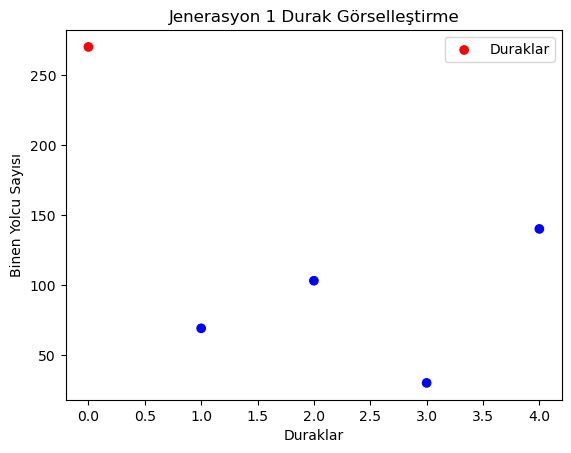

Generation 2: Best Fitness = 616.0


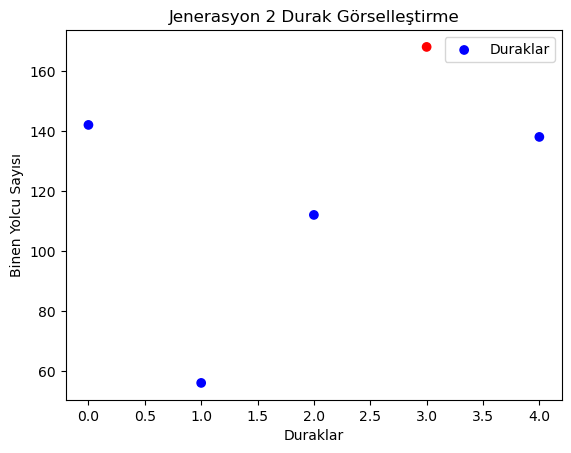

Generation 3: Best Fitness = 616.0


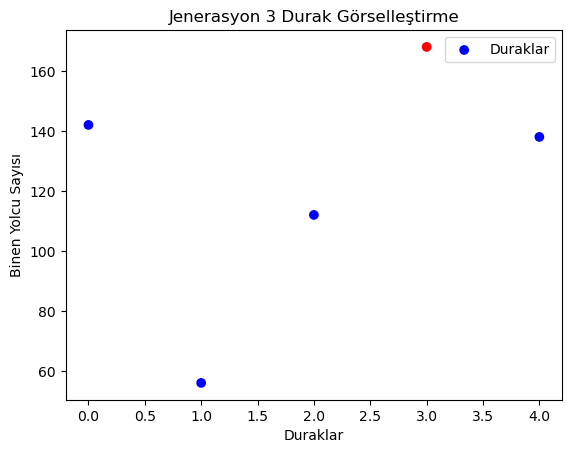

Generation 4: Best Fitness = 616.0


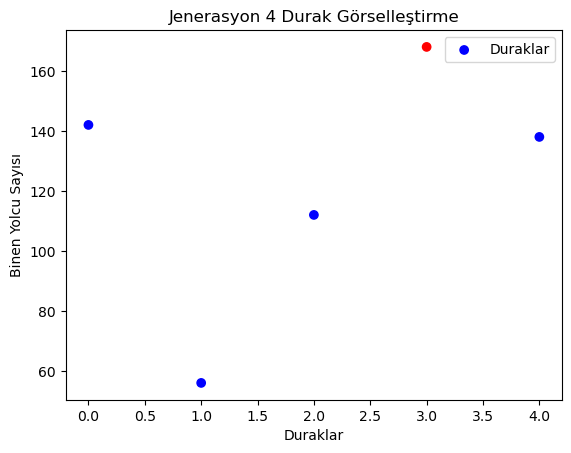

Generation 5: Best Fitness = 616.0


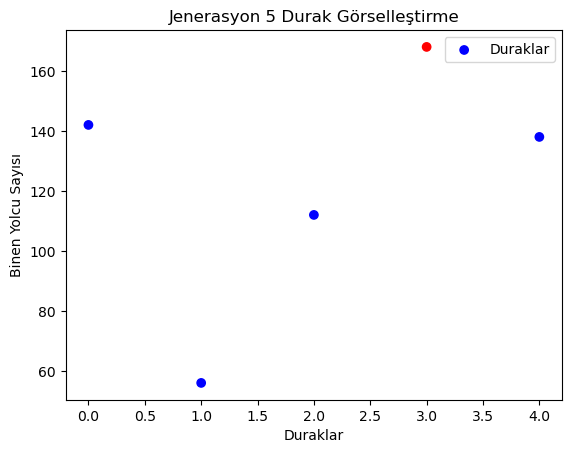

Generation 6: Best Fitness = 616.0


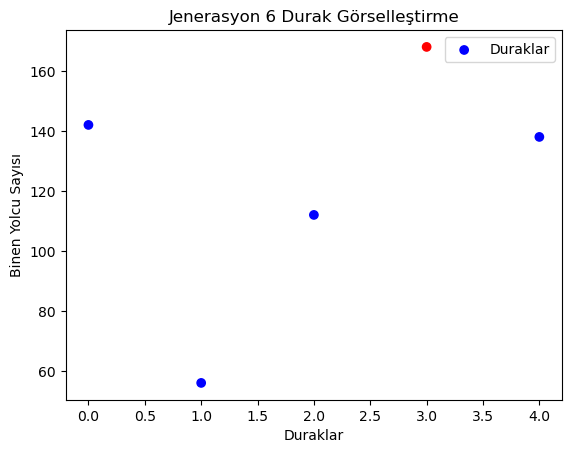

Generation 7: Best Fitness = 616.0


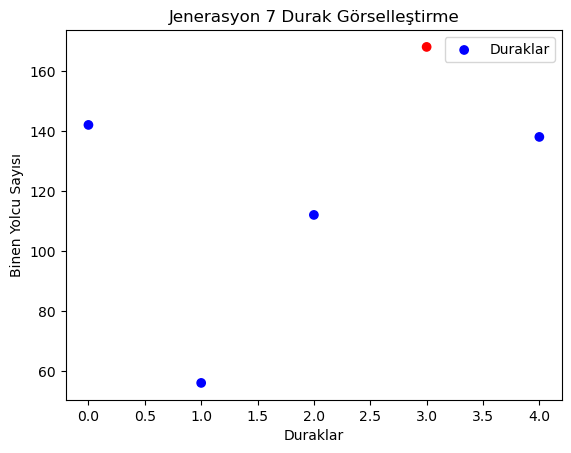

Generation 8: Best Fitness = 616.0


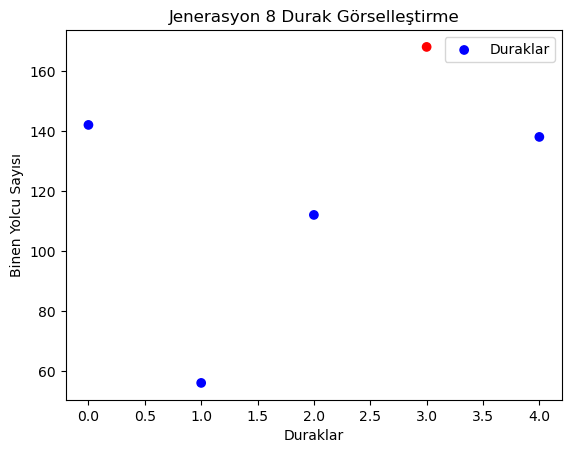

Generation 9: Best Fitness = 647.0


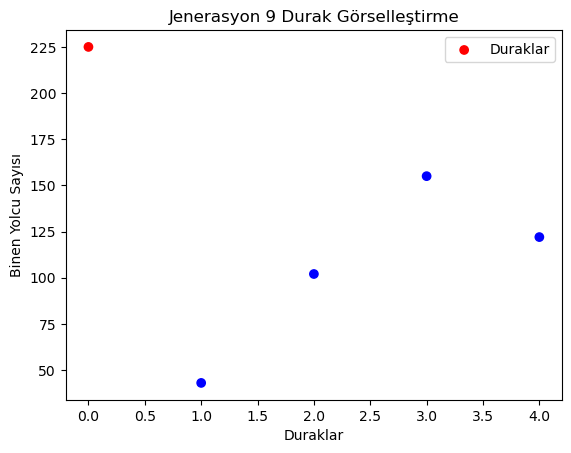

Generation 10: Best Fitness = 647.0


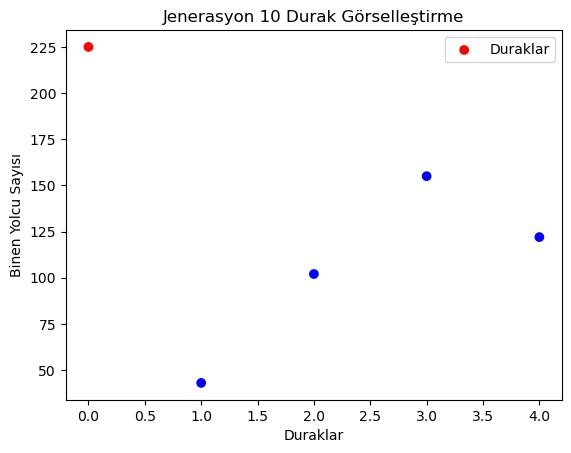

Optimal Duraklar Sırası: [0, 3, 4, 2, 1]
Optimal Fitness: 647.0
Optimal Generation: 9
Durak Yolcu Bilgileri (Durak Sırasına Göre):
Durak 0: Binen = 225, İnen = 0, Mevcut Yolcu = 225
Durak 3: Binen = 155, İnen = 99, Mevcut Yolcu = 228
Durak 4: Binen = 122, İnen = 170, Mevcut Yolcu = 180
Durak 2: Binen = 102, İnen = 55, Mevcut Yolcu = 172
Durak 1: Binen = 43, İnen = 143, Mevcut Yolcu = 125


In [167]:
optimal_duraklar, optimal_fitness, optimal_generation, sorted_yolcu_bilgileri, optimal_stop = genetic_algorithm()
print("Optimal Duraklar Sırası:", [durak[0] for durak in sorted_yolcu_bilgileri])
print("Optimal Fitness:", optimal_fitness)
print("Optimal Generation:", optimal_generation)
print("Durak Yolcu Bilgileri (Durak Sırasına Göre):")
for durak, binen, inen, mevcut in sorted_yolcu_bilgileri:
    print(f"Durak {durak}: Binen = {binen}, İnen = {inen}, Mevcut Yolcu = {mevcut}")

In [173]:
durak, binen, inen, mevcut = optimal_stop
print(f"En Optimal Durak: {durak}, Binen Yolcu: {binen}, İnen Yolcu: {inen}, Mevcut Yolcu: {mevcut}, Optimal Generation: {optimal_generation}")

En Optimal Durak: 0, Binen Yolcu: 225, İnen Yolcu: 0, Mevcut Yolcu: 225, Optimal Generation: 9
